# Diagnostics

## Cross validation (đánh giá chéo)

Prophet bao gồm chức năng đánh giá chéo chuỗi thời gian để đo lỗi dự báo bằng dữ liệu lịch sử. Điều này được thực hiện bằng cách chọn các điểm cutoff trong lịch sử và đối với mỗi điểm trong số chúng, mô hình chỉ fit với dữ liệu cho đến điểm cutoff đó. Sau đó, chúng tôi có thể so sánh các giá trị được dự báo với các giá trị thực tế. Hình này minh họa dự báo lịch sử mô phỏng trên bộ dữ liệu Peyton Manning, trong đó mô hình phù hợp với lịch sử ban đầu là 5 năm và dự báo được đưa ra trong khoảng thời gian một năm.

![Ví dụ](https://facebook.github.io/prophet/static/diagnostics_files/diagnostics_4_0.png)

[Bài báo Prophet](https://peerj.com/preprints/3190.pdf) mô tả thêm về các dự báo lịch sử mô phỏng.

Quy trình đánh giá chéo này có thể được thực hiện tự động cho một loạt các giới hạn lịch sử bằng cách sử dụng hàm `cross_validation`. Chúng tôi chỉ định đường chân trời dự báo (`horizon`), sau đó tùy chọn kích thước của khoảng thời gian đào tạo ban đầu (`initial`) và khoảng cách giữa các ngày giới hạn (`period`). Theo mặc định, thời gian đào tạo ban đầu được đặt thành ba lần đường chân trời và các điểm cắt được thực hiện cứ sau nửa đường chân trời.

Đầu ra của `cross_validation` là một dataframe có giá trị thực `y` và giá trị dự báo nằm ngoài mẫu `yhat`, tại mỗi ngày dự báo mô phỏng và cho mỗi ngày cutoff. Cụ thể, một dự báo được thực hiện cho mọi điểm được quan sát giữa `cutoff` và `cutoff + horizon`. Dataframe này sau đó có thể được sử dụng để tính toán các phép đo lỗi của `yhat` so với `y`.

Ở đây, chúng tôi thực hiện đánh giá chéo để đánh giá hiệu suất dự đoán trong khoảng thời gian 365 ngày, bắt đầu với 730 ngày dữ liệu đào tạo trong lần cắt đầu tiên và sau đó đưa ra dự đoán sau mỗi 180 ngày. Trên chuỗi thời gian 8 năm này, điều này tương ứng với tổng số 11 dự báo.

In [1]:
import pandas as pd
from prophet import Prophet

df=pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
m=Prophet()
m.fit(df)
futures=m.make_future_dataframe(periods=365)
forecast=m.predict(futures)

19:31:33 - cmdstanpy - INFO - Chain [1] start processing
19:31:33 - cmdstanpy - INFO - Chain [1] done processing


In [2]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

  0%|          | 0/11 [00:00<?, ?it/s]

19:31:52 - cmdstanpy - INFO - Chain [1] start processing
19:31:52 - cmdstanpy - INFO - Chain [1] done processing
19:31:53 - cmdstanpy - INFO - Chain [1] start processing
19:31:53 - cmdstanpy - INFO - Chain [1] done processing
19:31:53 - cmdstanpy - INFO - Chain [1] start processing
19:31:53 - cmdstanpy - INFO - Chain [1] done processing
19:31:54 - cmdstanpy - INFO - Chain [1] start processing
19:31:54 - cmdstanpy - INFO - Chain [1] done processing
19:31:54 - cmdstanpy - INFO - Chain [1] start processing
19:31:54 - cmdstanpy - INFO - Chain [1] done processing
19:31:55 - cmdstanpy - INFO - Chain [1] start processing
19:31:55 - cmdstanpy - INFO - Chain [1] done processing
19:31:55 - cmdstanpy - INFO - Chain [1] start processing
19:31:56 - cmdstanpy - INFO - Chain [1] done processing
19:31:56 - cmdstanpy - INFO - Chain [1] start processing
19:31:56 - cmdstanpy - INFO - Chain [1] done processing
19:31:57 - cmdstanpy - INFO - Chain [1] start processing
19:31:57 - cmdstanpy - INFO - Chain [1]

In [6]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-02-16,8.955733,8.449707,9.472082,8.242493,2010-02-15
1,2010-02-17,8.722134,8.208931,9.189150,8.008033,2010-02-15
2,2010-02-18,8.605869,8.108854,9.083991,8.045268,2010-02-15
3,2010-02-19,8.527697,8.035997,9.059191,7.928766,2010-02-15
4,2010-02-20,8.269636,7.796091,8.742779,7.745003,2010-02-15


Trong R, các `units` đối số phải là loại được chấp nhận bởi `as.difftime`, là số tuần hoặc ngắn hơn. Trong Python, chuỗi dành cho `initial`, `period` và `horizon` phải ở định dạng được sử dụng bởi Pandas Timedelta, chấp nhận đơn vị ngày hoặc ngắn hơn.

Cutoffs tùy chỉnh cũng có thể được cung cấp dưới dạng danh sách ngày cho từ khóa `cutoffs` trong hàm `cross_validation` trong Python và R. Ví dụ: ba ngưỡng cách nhau sáu tháng, sẽ cần được chuyển đến đối số `cutoffs` ở định dạng ngày như:

In [7]:
cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])
df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='365 days')

  0%|          | 0/3 [00:00<?, ?it/s]

19:40:48 - cmdstanpy - INFO - Chain [1] start processing
19:40:48 - cmdstanpy - INFO - Chain [1] done processing
19:40:49 - cmdstanpy - INFO - Chain [1] start processing
19:40:49 - cmdstanpy - INFO - Chain [1] done processing
19:40:50 - cmdstanpy - INFO - Chain [1] start processing
19:40:50 - cmdstanpy - INFO - Chain [1] done processing


Tiện ích `performance_metrics` có thể được sử dụng để tính toán một số thống kê hữu ích về hiệu suất dự đoán (`yhat`, `yhat_lower` và `yhat_upper` so với y), như một hàm của khoảng cách từ cutofff (dự đoán còn bao xa trong tương lai). Số liệu thống kê được tính toán là lỗi bình phương trung bình (MSE), lỗi bình phương trung bình gốc (RMSE), lỗi tuyệt đối trung bình (MAE), lỗi phần trăm tuyệt đối trung bình (MAPE), lỗi phần trăm tuyệt đối trung bình (MDAPE) và phạm vi của các ước tính `yhat_lower` và `yhat_upper`. Chúng được tính toán trên một cửa sổ cuộn của các dự đoán trong `df_cv` sau khi sắp xếp theo horizon (`ds` trừ `cutoff`). Theo mặc định, 10% dự đoán sẽ được đưa vào mỗi cửa sổ, nhưng điều này có thể được thay đổi bằng đối số `rolling_window`.

In [8]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.493120,0.702225,0.503815,0.058359,0.049703,0.058662,0.682960
1,38 days,0.498916,0.706340,0.508779,0.058933,0.049452,0.059296,0.681590
2,39 days,0.521185,0.721931,0.514880,0.059533,0.049531,0.060022,0.680219
3,40 days,0.528460,0.726953,0.517753,0.059840,0.049394,0.060399,0.683874
4,41 days,0.535889,0.732044,0.518692,0.059912,0.049452,0.060535,0.691412


Số liệu hiệu suất cross validation có thể được hiển thị trực quan với `plot_cross_validation_metric`, được hiển thị ở đây cho MAPE. Dấu chấm hiển thị lỗi phần trăm tuyệt đối cho từng dự đoán trong `df_cv`. Đường màu xanh lam hiển thị MAPE, trong đó giá trị trung bình được lấy trên một cửa sổ cuộn của các dấu chấm. Đối với dự báo này, chúng tôi thấy rằng sai số khoảng 5% là điển hình đối với các dự đoán trong tương lai một tháng và sai số đó tăng lên đến khoảng 11% đối với các dự đoán đã hết một năm.

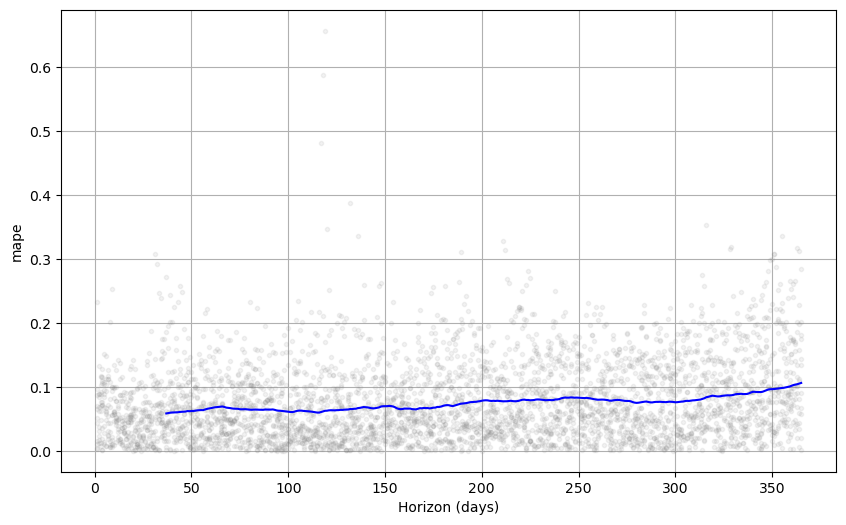

In [9]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

Kích thước của cửa sổ cuộn trong hình có thể được thay đổi bằng đối số tùy chọn `rolling_window`, xác định tỷ lệ dự báo sẽ sử dụng trong mỗi cửa sổ cuộn. Giá trị mặc định là 0,1, tương ứng với 10% số hàng từ `df_cv` được bao gồm trong mỗi cửa sổ; tăng điều này sẽ dẫn đến một đường cong trung bình mượt mà hơn trong hình. Khoảng thời gian `initial` phải đủ dài để nắm bắt tất cả các thành phần của mô hình, đặc biệt là tính thời vụ và các biến hồi quy bổ sung: ít nhất một năm đối với tính thời vụ hàng năm, ít nhất một tuần đối với tính thời vụ hàng tuần, v.v.

## Parallelizing cross validation (Đánh giá chéo song song)

Đánh giá chéo cũng có thể được chạy ở chế độ song song trong Python, bằng cách đặt chỉ định từ khóa `parallel`. Bốn chế độ được hỗ trợ
- `parallel=None` (Mặc định, không song song)
- `parallel="processes"`
- `parallel="threads"`
- `parallel="dask"`

Đối với các vấn đề không quá lớn, chúng tôi khuyên bạn nên sử dụng Parallel="Processes". Nó sẽ đạt được hiệu suất cao nhất khi việc xác thực chéo song song có thể được thực hiện trên một máy duy nhất. Đối với các vấn đề lớn, một cụm Dask có thể được sử dụng để thực hiện xác thực chéo trên nhiều máy. Bạn sẽ cần cài đặt Dask riêng vì nó sẽ không được cài đặt cùng với Prophet.

In [10]:
from dask.distributed import Client



client = Client()  # connect to the cluster

df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days',

                         parallel="dask")

## Hyperparameter tuning (Tinh chỉnh siêu tham số)

Đánh giá chéo có thể được sử dụng để điều chỉnh các siêu tham số của mô hình, chẳng hạn như `changepoint_prior_scale` và `seasonity_prior_scale`. Một ví dụ Python được đưa ra bên dưới, với lưới 4x4 gồm hai tham số đó, với sự song song hóa trên các điểm cắt. Ở đây, các tham số được đánh giá trên RMSE trung bình trong khoảng thời gian 30 ngày, nhưng các chỉ số hiệu suất khác nhau có thể phù hợp với các vấn đề khác nhau.

In [11]:
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

19:55:49 - cmdstanpy - INFO - Chain [1] start processing
19:55:49 - cmdstanpy - INFO - Chain [1] done processing
19:55:53 - cmdstanpy - INFO - Chain [1] start processing
19:55:53 - cmdstanpy - INFO - Chain [1] done processing
19:55:56 - cmdstanpy - INFO - Chain [1] start processing
19:55:56 - cmdstanpy - INFO - Chain [1] done processing
19:56:00 - cmdstanpy - INFO - Chain [1] start processing
19:56:00 - cmdstanpy - INFO - Chain [1] done processing
19:56:03 - cmdstanpy - INFO - Chain [1] start processing
19:56:03 - cmdstanpy - INFO - Chain [1] done processing
19:56:07 - cmdstanpy - INFO - Chain [1] start processing
19:56:07 - cmdstanpy - INFO - Chain [1] done processing
19:56:10 - cmdstanpy - INFO - Chain [1] start processing
19:56:11 - cmdstanpy - INFO - Chain [1] done processing
19:56:14 - cmdstanpy - INFO - Chain [1] start processing
19:56:14 - cmdstanpy - INFO - Chain [1] done processing
19:56:18 - cmdstanpy - INFO - Chain [1] start processing
19:56:19 - cmdstanpy - INFO - Chain [1]

    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  0.757537
1                     0.001                     0.10  0.750487
2                     0.001                     1.00  0.752860
3                     0.001                    10.00  0.759450
4                     0.010                     0.01  0.541647
5                     0.010                     0.10  0.539561
6                     0.010                     1.00  0.542953
7                     0.010                    10.00  0.541576
8                     0.100                     0.01  0.523861
9                     0.100                     0.10  0.520464
10                    0.100                     1.00  0.519925
11                    0.100                    10.00  0.515245
12                    0.500                     0.01  0.530106
13                    0.500                     0.10  0.526399
14                    0.500                     1.00  0

In [12]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 10.0}


Ngoài ra, việc song song hóa có thể được thực hiện trên các tổ hợp tham số bằng cách song song hóa vòng lặp ở trên.

Mô hình Prophet có một số tham số đầu vào mà người ta có thể cân nhắc điều chỉnh. Dưới đây là một số khuyến nghị chung để điều chỉnh siêu tham số có thể là một điểm khởi đầu tốt.

### Parameters that can be tuned (Các tham số mà có thể tinh chỉnh)

- `changepoint_prior_scale`: Đây có lẽ là thông số có tác động mạnh nhất. Nó xác định tính linh hoạt của xu hướng và đặc biệt là mức độ thay đổi của xu hướng tại các điểm thay đổi xu hướng. Như được mô tả trong tài liệu này, nếu nó quá nhỏ, xu hướng sẽ không phù hợp và phương sai lẽ ra phải được lập mô hình với những thay đổi của xu hướng thay vào đó sẽ được xử lý bằng thuật ngữ nhiễu. Nếu nó quá lớn, xu hướng sẽ phù hợp quá mức và trong trường hợp cực đoan nhất, bạn có thể kết thúc với xu hướng nắm bắt tính thời vụ hàng năm. Mặc định là 0,05 hoạt động trong nhiều chuỗi thời gian, nhưng điều này có thể được điều chỉnh; một phạm vi [0,001, 0,5] có thể sẽ đúng. Các tham số như thế này (hình phạt chính quy hóa; đây thực sự là hình phạt thòng lọng) thường được điều chỉnh trên thang log.
- `seasonity_prior_scale`: Tham số này kiểm soát tính linh hoạt của tính thời vụ. Tương tự, một giá trị lớn cho phép tính thời vụ phù hợp với những biến động lớn, một giá trị nhỏ sẽ thu nhỏ độ lớn của tính thời vụ. Mặc định là 10., về cơ bản không áp dụng chính quy. Đó là bởi vì chúng ta rất hiếm khi thấy quá khớp ở đây (có sự chuẩn hóa vốn có với thực tế là nó đang được mô hình hóa bằng một chuỗi Fourier bị cắt bớt, do đó, về cơ bản, nó được lọc thông thấp). Phạm vi hợp lý để điều chỉnh có thể là [0,01, 10]; khi đặt thành 0,01, bạn sẽ thấy rằng cường độ của tính thời vụ buộc phải rất nhỏ. Điều này cũng có thể có ý nghĩa trên thang đo log, vì nó thực sự là một hình phạt L2 giống như trong hồi quy sườn núi.
- `holidays_prior_scale`: Điều này kiểm soát tính linh hoạt để phù hợp với các hiệu ứng ngày lễ. Tương tự như Seasonity_prior_scale, nó mặc định là 10.0, về cơ bản không áp dụng chính quy hóa, vì chúng tôi thường có nhiều quan sát về các ngày lễ và có thể thực hiện tốt công việc ước tính tác động của chúng. Điều này cũng có thể được điều chỉnh trong phạm vi [0,01, 10] như với Seasonity_prior_scale.
- `seasonity_mode`: Các tùy chọn là [`'additive'`, `'multiplicative'`]. Mặc định là `'additive'`, nhưng nhiều chuỗi thời gian kinh doanh sẽ có tính thời vụ nhân lên. Điều này được xác định tốt nhất chỉ bằng cách nhìn vào chuỗi thời gian và xem liệu cường độ của biến động theo mùa có tăng theo cường độ của chuỗi thời gian hay không (xem tài liệu ở đây về tính thời vụ nhân lên), nhưng khi điều đó là không thể, nó có thể được điều chỉnh.

### Maybe tune? (Có thể tinh chỉnh?)

- `changepoint_range`: Đây là tỷ lệ lịch sử mà xu hướng được phép thay đổi. Điều này mặc định là 0,8, 80% lịch sử, nghĩa là mô hình sẽ không phù hợp với bất kỳ thay đổi xu hướng nào trong 20% cuối cùng của chuỗi thời gian. Điều này khá thận trọng, để tránh trang bị quá mức cho các thay đổi xu hướng vào cuối chuỗi thời gian khi không còn đủ đường băng để phù hợp với nó. Với một con người trong vòng lặp, đây là điều có thể được xác định khá dễ dàng một cách trực quan: người ta có thể thấy khá rõ liệu dự báo có hoạt động kém trong 20% vừa qua hay không. Trong môi trường hoàn toàn tự động, có thể ít bảo thủ hơn có thể có ích. Có khả năng sẽ không thể điều chỉnh tham số này một cách hiệu quả bằng xác thực chéo qua các ngưỡng như mô tả ở trên. Khả năng khái quát hóa của mô hình từ sự thay đổi xu hướng trong 10% cuối cùng của chuỗi thời gian sẽ khó học hỏi khi xem xét các điểm cắt trước đó có thể không có thay đổi xu hướng trong 10% cuối cùng. Vì vậy, tham số này có lẽ tốt hơn là không được điều chỉnh, ngoại trừ có lẽ trong một số lượng lớn chuỗi thời gian. Trong cài đặt đó, [0,8, 0,95] có thể là phạm vi hợp lý.

### Parameters that would likely not be tuned (Các thông số có khả năng sẽ không được điều chỉnh)

- `growth`: Các tùy chọn là 'tuyến tính' và 'logistic'. Điều này có thể sẽ không được điều chỉnh; nếu có một điểm bão hòa đã biết và tăng trưởng theo điểm đó thì nó sẽ được đưa vào và xu hướng logistic sẽ được sử dụng, nếu không thì nó sẽ là tuyến tính.
- `changepoints`: Đây là để chỉ định thủ công vị trí của các điểm thay đổi. Không có gì theo mặc định, sẽ tự động đặt chúng.
- `n_changepoints`: Đây là số điểm thay đổi được đặt tự động. Giá trị mặc định là 25 sẽ đủ để nắm bắt các thay đổi về xu hướng trong một chuỗi thời gian điển hình (ít nhất là loại mà Prophet sẽ hoạt động tốt). Thay vì tăng hoặc giảm số lượng điểm thay đổi, có thể sẽ hiệu quả hơn nếu tập trung vào việc tăng hoặc giảm tính linh hoạt ở những thay đổi xu hướng đó, điều này được thực hiện với `changepoint_prior_scale`.
- `yearly_seasonality`: Theo mặc định (‘auto’), tính năng này sẽ bật tính năng theo mùa hàng năm nếu có dữ liệu một năm và tắt nếu không. Các tùy chọn là [‘auto’, True, False]. Nếu có dữ liệu hơn một năm, thay vì cố gắng tắt tính năng này trong HPO, thì có thể sẽ hiệu quả hơn nếu để tính năng này bật và tắt các hiệu ứng theo mùa bằng cách điều chỉnh theo `seasonality_prior_scale`.
- `weekly_seasonality`: Tương tự như `yearly_seasonality`.
- `daily_seasonality`: Tương tự như `yearly_seasonality`.
- `holidays`: Điều này sẽ được truyền trong một dataframe của các ngày lễ được chỉ định. Các hiệu ứng ngày lễ sẽ được điều chỉnh với `holidays_prior_scale`.
- `mcmc_samples`: MCMC có được sử dụng hay không sẽ có thể được xác định bởi các yếu tố như độ dài của chuỗi thời gian và tầm quan trọng của độ không đảm bảo của tham số (những cân nhắc này được mô tả trong tài liệu).
- `interval_width`: Prophet `predict` trả về các khoảng không chắc chắn cho từng thành phần, như `yhat_lower` và `yhat_upper` cho dự báo `yhat`. Chúng được tính là lượng phân vị của phân phối dự đoán sau và `interval_width` chỉ định lượng phân vị nào sẽ sử dụng. Giá trị mặc định là 0,8 cung cấp khoảng dự đoán 80%. Bạn có thể thay đổi giá trị đó thành 0,95 nếu muốn có khoảng thời gian 95%. Điều này sẽ chỉ ảnh hưởng đến khoảng không chắc chắn và hoàn toàn không thay đổi dự báo và do đó không cần phải điều chỉnh.
- `uncertainty_sample`: Các khoảng không chắc chắn được tính là phân vị từ khoảng dự đoán sau và khoảng dự đoán sau được ước tính bằng cách lấy mẫu Monte Carlo. Tham số này là số lượng mẫu sẽ sử dụng (mặc định là 1000). Thời gian chạy để dự đoán sẽ là tuyến tính trong số này. Làm cho nó nhỏ hơn sẽ làm tăng phương sai (lỗi Monte Carlo) của khoảng không chắc chắn và làm cho nó lớn hơn sẽ làm giảm phương sai đó. Vì vậy, nếu các ước tính về độ không đảm bảo dường như bị lởm chởm thì điều này có thể được tăng lên để tiếp tục làm phẳng chúng, nhưng có thể sẽ không cần phải thay đổi. Như với `interval_width`, tham số này chỉ ảnh hưởng đến các khoảng không chắc chắn và việc thay đổi nó sẽ không ảnh hưởng đến dự báo `yhat` theo bất kỳ cách nào; nó không cần phải được điều chỉnh.
- `stan_backend`: Nếu cả hai phần phụ trợ pystan và cmdstanpy được thiết lập, phần phụ trợ có thể được chỉ định. Các dự đoán sẽ giống nhau, điều này sẽ không được điều chỉnh.